# Constructing Brownian Motion Using Haar Wavelets

In [1]:
import numpy as np
from matplotlib import pyplot as plt

<ipython-input-4-cd1cb762a5f8>:43: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


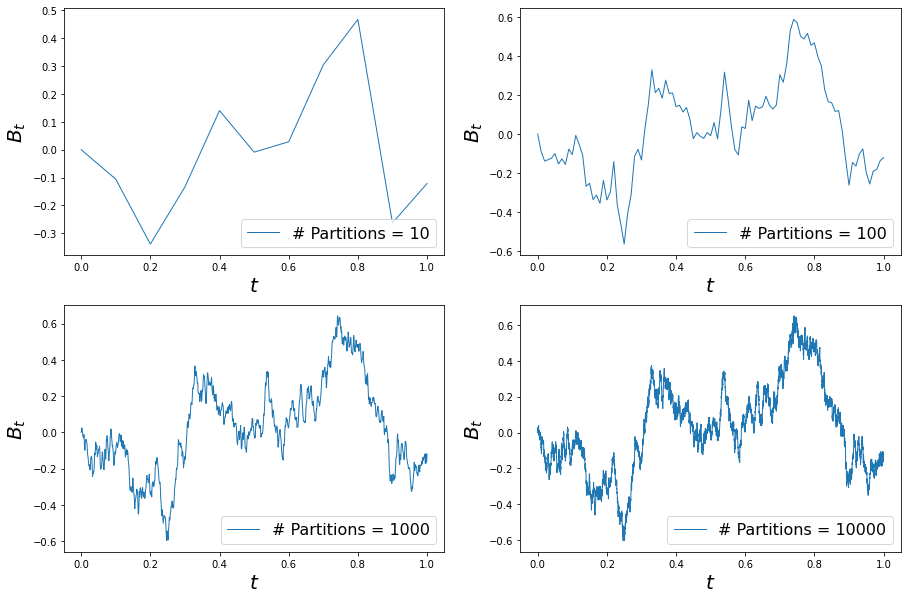

In [4]:
K = 14
N = 2**K

# Generate iid standard normals

np.random.seed(20221228)
Z = np.random.normal(size=(N,))

# creating multiple subplots
fig, ax = plt.subplots(2,2, figsize=(15,10))
ax = ax.reshape(-1,)
plot_idx = 0

# simulating Brownian motion with different time-partition mesh

for M in [10, 100, 1000, 10000]:
    
    K = int(max(10,np.ceil(np.log2(M))))

    time_partition = np.linspace(0,1,num=M+1)
    brownian = np.zeros(shape=(M+1,))
    var = np.zeros(shape=(M+1,))

    for i in range(M+1):
        t = time_partition[i]
        brownian[i] += t*Z[0]
        var[i] += t**2
        for k in range(K):
            for j in range(2**k):
                positive = max(min(t,(2**(-k))*(j+0.5))-(2**(-k))*j,0)
                negative = max(min(t,(2**(-k))*(j+1))-(2**(-k))*(j+0.5),0)
                step = positive - negative
                brownian[i] += (2**(k/2))*step*Z[2**k+j]
                var[i] += (2**k)*(step**2)

    ax[plot_idx].plot(time_partition, brownian,  label=f'# Partitions = {M}', linewidth=1)
    ax[plot_idx].set_xlabel(r'$t$', fontsize=20)
    ax[plot_idx].set_ylabel(r'$B_t$', fontsize=20)
    ax[plot_idx].legend(fontsize=16, loc='lower right')
    plot_idx += 1

ax = ax.reshape(2,2)
fig.show()

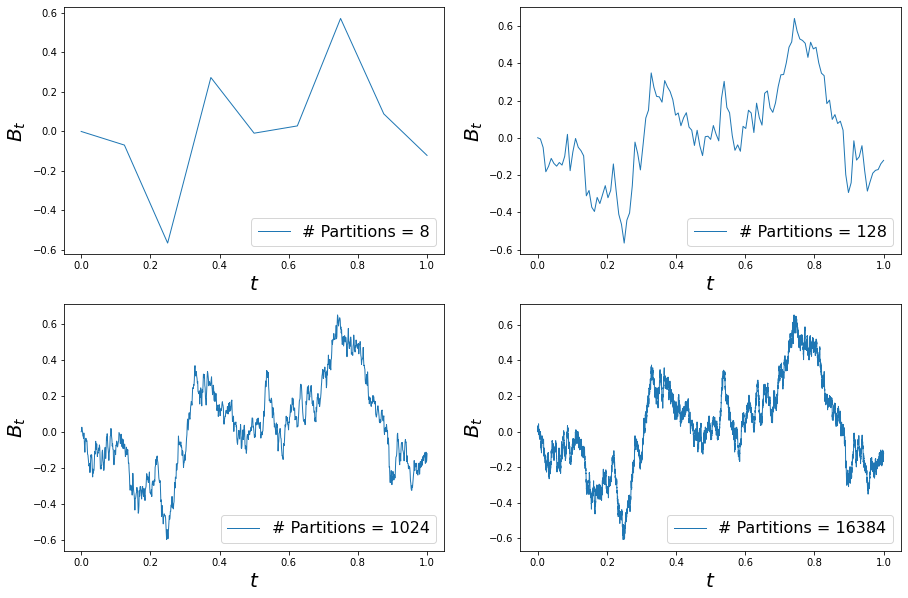

In [6]:
# another similar, but efficient, way to construct Brownian path

K = 14  # max number of partitions = 2**N

# Generate iid standard normals
np.random.seed(20221228)

time = np.array([0, 1])
Z = np.array([0, np.random.normal()])

time_and_Z = np.array([time, Z])

# creating multiple subplots
fig, ax = plt.subplots(2,2, figsize=(15,10))
ax = ax.reshape(-1,)
i = 0

# simulation

for k in range(K):
    N = 2**k+1

    midpoint = np.array([time_and_Z[:,i:i+2].mean(axis=1) for i in range(N-1)]).T

    new = np.zeros((2,2*N-1))    
    new[:,::2] = time_and_Z
    new[:,1::2] = midpoint

    # adding randomness to the interpolation
    new[1,1::2] += 2**(-0.5*k-1)*np.random.normal(size=(N-1,))

    time_and_Z = new
    
    if k+1 in [3, 7, 10, 14]:
        #plt.axis('off')
        ax[i].plot(time_and_Z[0], time_and_Z[1],  label=f'# Partitions = {2**(k+1)}', linewidth=1)
        ax[i].set_xlabel(r'$t$', fontsize=20)
        ax[i].set_ylabel(r'$B_t$', fontsize=20)
        ax[i].legend(fontsize=16, loc='lower right')
        #ax[i].set_xticks(fontsize=15)
        #ax[i].set_yticks(fontsize=15)
        i += 1
        
ax = ax.reshape(2,2)
plt.show()